# Data Analysis on Video Game Sales

## Pre Processing Data

## Final Objective

- **Predict Japanese Sales using North America, European and Other Sales, Genre and Platform.**
> This result is important for games that want to enter the Japenese Market, but don't know what to expect for their respective sales team. Also, it will be a good measure to invest (or not) in japanese translations.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Importing Data

In [2]:
path = "../Data/vgsales.csv"

In [3]:
df_games = pd.read_csv(path, index_col=0)

In [4]:
df_games

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


### DataFrame summary

In [5]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
Name            16598 non-null object
Platform        16598 non-null object
Year            16327 non-null float64
Genre           16598 non-null object
Publisher       16540 non-null object
NA_Sales        16598 non-null float64
EU_Sales        16598 non-null float64
JP_Sales        16598 non-null float64
Other_Sales     16598 non-null float64
Global_Sales    16598 non-null float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


### About Features

- Year -> year values
- NA_Sales -> million dollars
- EU_Sales -> million dollars
- JP_Sales -> million dollars
- Other_Sales -> million dollars
- Global_Sales -> million dollars

### Removing Rows with NaN values

In [6]:
df_games = df_games.dropna(how='any',axis=0)

In [7]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 1 to 16600
Data columns (total 10 columns):
Name            16291 non-null object
Platform        16291 non-null object
Year            16291 non-null float64
Genre           16291 non-null object
Publisher       16291 non-null object
NA_Sales        16291 non-null float64
EU_Sales        16291 non-null float64
JP_Sales        16291 non-null float64
Other_Sales     16291 non-null float64
Global_Sales    16291 non-null float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


#### About
After dropping NaN values, we have lost **307** rows of data.

### Understanding Simple Metric for Numeric Columns

In [8]:
df_games.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


As we can see, from Global Sales, we have a massive almost **50%** of the 16291 games selling less than 170k dollars worldwide.

### Columns to be used for Modelling

- Platform
- Genre
- NA_Sales
- EU_Sales
- JP_Sales
- Other_Sales

### Observations

- Global Sales is just the sum for all Sales columns.
- Platform and Genre need to have their respective key as a number for the purpose of modelling them into a machine learning algorithm.

### Generating correct .CSVs

#### CSV for Visualizations

In [9]:
df_visualizations = df_games
df_visualizations.to_csv("../Data/visualizations_sales.csv")

In [10]:
df_visualizations

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01


#### CSV for Modelling

In [11]:
df_model = df_games[["Platform", "Genre", "NA_Sales", "EU_Sales", "Other_Sales", "JP_Sales"]]

In [12]:
df_model

,Platform,Genre,NA_Sales,EU_Sales,Other_Sales,JP_Sales
Rank,,,,,,
1,Wii,Sports,41.49,29.02,8.46,3.77
2,NES,Platform,29.08,3.58,0.77,6.81
3,Wii,Racing,15.85,12.88,3.31,3.79
4,Wii,Sports,15.75,11.01,2.96,3.28
5,GB,Role-Playing,11.27,8.89,1.00,10.22
...,...,...,...,...,...,...
16596,GBA,Platform,0.01,0.00,0.00,0.00
16597,GC,Shooter,0.01,0.00,0.00,0.00
16598,PS2,Racing,0.00,0.00,0.00,0.00


#### Defining key values for platforms

In [13]:
df_model_sklearn = df_model.copy()

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_model_sklearn['Platform'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_, index=df_model.index)

df_model_result = pd.concat([df_model_sklearn, lb_results_df], axis=1)

df_model = df_model_result.drop("Platform", axis="columns")

#### Defining key values for genres

In [14]:
df_model_sklearn = df_model.copy()

lb = LabelBinarizer()
lb_results = lb.fit_transform(df_model_sklearn['Genre'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_, index=df_model.index)

df_model_result = pd.concat([df_model_sklearn, lb_results_df], axis=1)

df_model = df_model_result.drop("Genre", axis="columns")

### Results for df_model

In [15]:
df_model.head()

,NA_Sales,EU_Sales,Other_Sales,JP_Sales,2600,3DO,3DS,DC,DS,GB,...,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Rank,,,,,,,,,,,,,,,,,,,,,
1,41.49,29.02,8.46,3.77,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,29.08,3.58,0.77,6.81,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,15.85,12.88,3.31,3.79,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,15.75,11.01,2.96,3.28,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,11.27,8.89,1.00,10.22,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0


It looks correct now! Now the only important thing to do is to separate data into **TRAIN** and **VALIDATION**. I chose not to normalize my data because of the range of Sales values (from 0 to 41), having 75% of the values below 1.

## Separating Data

In [16]:
df_output_model = df_model[["JP_Sales"]]

In [17]:
df_input_model  = df_model.drop("JP_Sales", axis="columns")

In [18]:
input_train, input_validation, output_train, output_validation = train_test_split(
                                                                                  df_input_model, 
                                                                                  df_output_model, 
                                                                                  test_size=0.25,
                                                                                 )

# Saving Main DataFrames as CSV

In [19]:
input_train.to_csv("../Data/input_train_sales.csv")
input_validation.to_csv("../Data/input_validation_sales.csv")
output_train.to_csv("../Data/output_train_sales.csv")
output_validation.to_csv("../Data/output_validation_sales.csv")

<h1><center>END OF PRE PROCESSING!</center></h1>

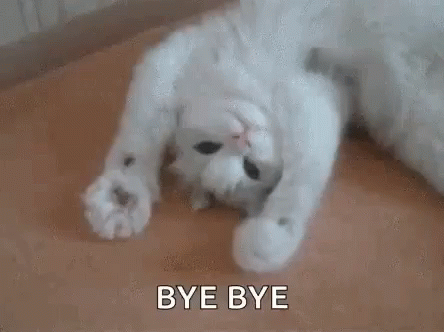